# NumPy, Matplotlib を用いた初等数学の復習

本章では、数学の基礎的な事項を復習しながら、Python で数値計算を高速に行うためのライブラリ（[注釈1](#note1)）である NumPy と， グラフの描画を行うためのライブラリである Matplotlib の使い方を学びます。

NumPy による**多次元配列（multidimensional array）**の扱い方を知ることは、他の様々なライブラリを利用する際に役立ちます。
例えば、様々な機械学習手法を統一的なインターフェースで利用できる **scikit-learn** や、ニューラルネットワークの記述・学習を行うためのフレームワークである **PyTorch** は、NumPy に慣れておくことでとても使いやすくなります。

それでは、まず NumPy の基礎的な使用方法を説明します。


## NumPy と Matplotlib を使う準備

NumPy や Matplotlib などのライブラリを利用する際には、仮想環境上にこれらをインストールする必要があります。
NumPy と Matplotlib をインストールするためには、仮想環境が有効化されているターミナルで以下のコマンドを実行します。
```
$ pip install numpy matplotlib
```

`pip` コマンドは Python ライブラリをインストールするためのコマンドであり、NumPy や Matplotlib 以外にも以下の構文を用いて様々なライブラリをインストールできます。
```
$ pip install <ライブラリ名>
```
今後、他のライブラリが必要となった際には、このコマンドを用いてインストールを行います．

以上の操作で NumPy と Matplotlib のインストール作業は完了したものの、これだけではライブラリの機能を利用することができません。
ライブラリの機能を利用するには、そのライブラリが提供するモジュールを読み込む必要があります。

例えば `A` というモジュールを読み込みたいとき、一番シンプルな記述方法は `import A` です。
ただ、もし `A` というモジュール名が長い場合は、`import A as B` のようにして別名を付けることができます。
`as` を使って別名が与えられると、以降そのモジュールはその別名を用いて利用することができます。
`import A as B` と書くと、`A` というモジュールは `B` という名前で利用することができます。
これは Python の機能なので NumPy 以外のモジュールを読み込みたい場合にも使用可能です。

慣習的に、`numpy` にはしばしば `np` という別名が与えられます。
コード中で頻繁に使用するモジュールには、短い別名をつけて定義することがよく行われます。

それでは、`python` コマンドを実行して対話型インタプリタを起動し、 `numpy` を `np` という名前で `import` してみましょう。

In [1]:
import numpy as np

## 多次元配列を定義する

このあとの例で見ていくように、関数のグラフを描画したりする際には、入力変数を様々に変化させながら出力変数を計算する必要があります。
このようにたくさんの数を同時に扱う際、プログラミング上は多次元配列を用いることが便利です．
NumPy では ndarray というクラスで多次元配列を表現します（[注釈2](#note2)）。
早速、これを用いて1次元配列を定義してみましょう。

In [2]:
# 1次元配列の定義
a = np.array([1, 2, 3])

a

array([1, 2, 3])

このように、Python リスト `[1, 2, 3]` を `np.array()` に渡すことで、$[1, 2, 3]$ という配列を表す ndarray オブジェクトを作ることができます。
ndarray オブジェクトは `shape` という**属性 （attribute）** を持っており、その多次元配列の**形 （shape）** が保存されています。
上で定義した `a` という ndarray オブジェクトの形を調べてみましょう。

In [68]:
a.shape

(5, 5)

`(3,)` という要素数が 1 の Python のタプルが表示されています。
ndarray の形は、要素が整数のタプルで表され、要素数はその多次元配列の**次元数 （dimensionality, number of dimensions）** を表します。
形は、その多次元配列の各次元の大きさを順に並べた整数のタプルになっています。

次元数は、ndarray の `ndim` という属性に保存されています。

In [129]:
a.ndim

2

これは、`len(a.shape)` と同じ値になります。
今、`a` という ndarray は 1 次元配列なので、`a.shape` は要素数が 1 のタプルで、`ndim` の値は 1 でした（[注釈3](#note3)）。

では次に、数を縦横方向に3つずつ並べた2次元配列を定義してみましょう。

In [161]:
# 2次元配列の定義
b = np.array(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)

print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


形と次元数を調べます。

In [162]:
print('Shape:', b.shape)
print('Rank:', b.ndim)

Shape: (3, 3)
Rank: 2


ここで、`size` という属性も見てみましょう。

In [163]:
b.size

9

これは、`b` という ndarray が持つ要素の数を表しています。
`b` は $3 \times 3$ 行列なので、要素数は 9 です。
**「形」「次元数」「サイズ」という言葉がそれぞれ意味するものの違いを確認してください。**

NumPy の ndarray の作成方法には、`np.array()` を用いて Python のリストから多次元配列を作る方法以外にも、色々な方法があります。
以下に代表的な例をいくつか紹介します。

In [164]:
# 形を指定して、要素が全て 0 で埋められた ndarray を作る
a = np.zeros((3, 3))

a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [165]:
# 形を指定して、要素が全て 1 で埋められた ndarray を作る
b = np.ones((2, 3))

b

array([[1., 1., 1.],
       [1., 1., 1.]])

In [166]:
# 形と値を指定して、要素が指定した値で埋められた ndarray を作る
c = np.full((3, 2), 9)

c

array([[9, 9],
       [9, 9],
       [9, 9]])

In [167]:
# 指定された大きさの単位行列を表す ndarray を作る
d = np.eye(5)

d

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [168]:
# 形を指定して、 0 ~ 1 の間の乱数で要素を埋めた ndarray を作る
e = np.random.random((4, 5))

e

array([[0.49736282, 0.96235348, 0.77532939, 0.90875946, 0.90965119],
       [0.71648023, 0.39507605, 0.19535594, 0.11905966, 0.36664216],
       [0.56707097, 0.25486515, 0.59910258, 0.68067877, 0.41968921],
       [0.84953381, 0.16790096, 0.01730689, 0.01736658, 0.10500569]])

In [170]:
# 3 から始まり 10 になるまで 1 ずつ増加する数列を作る（10 は含まない）
f = np.arange(3, 10, 1)

f

array([3, 4, 5, 6, 7, 8, 9])

## 多次元配列の要素を選択する

前節では NumPy を使って多次元配列を定義するいくつかの方法を紹介しました。
本節では、作成した ndarray のうちの特定の要素を選択して、値を取り出す方法を紹介します。
最もよく行われる方法は `[]` を使った**添字表記 （subscription）** による要素の選択です。

### 整数による要素の選択

例えば、上で作成した `e` という $4 \times 5$ 行列を表す多次元配列から、1 行 2 列目の値を取り出すには、以下のようにします。

In [171]:
val = e[0, 1]

val

0.96235347897642

「1 行 2 列目」を指定するのに、インデックスは `[0, 1]` でした。
これは、NumPy の ndarray の要素は Python リストと同じく、添字が 0 から始まる**ゼロベースインデックス （zero-based index）** が採用されているためです。
つまり、この行列の i 行 j 列目の値は、`[i - 1, j - 1]` で取り出すことができます。

### スライスによる要素の選択

NumPy の ndarray に対しても、Python のリストと同様に**スライス表記 （slicing）** を用いて選択したい要素を範囲指定することができます。
ndarray はさらに、カンマ区切りで複数の次元に対するスライスを指定できます。

In [174]:
# 4 x 5 行列 e の真ん中の 2 x 3 = 6 個の値を取り出す
center = e[1:3, 1:4]

center

array([[0.39507605, 0.19535594, 0.11905966],
       [0.25486515, 0.59910258, 0.68067877]])

前節最後にある `e` の出力を見返すと、ちょうど真ん中の部分の $2 \times 3$ 個の数字が取り出せていることが分かります。
ここで、`e` の中から `[1, 1]` の要素を起点として 2 行 3 列を取り出して作られた `center` の形を、`e` の形と比較してみましょう。

In [175]:
print('Shape of e:', e.shape)
print('Shape of center:', center.shape)

Shape of e: (4, 5)
Shape of center: (2, 3)


また、インデックスを指定したり、スライスを用いて取り出した ndarray の一部に対し、値を代入することもできます。

In [176]:
# 先程の真ん中の 6 個の値を 0 にする
e[1:3, 1:4] = 0

e

array([[0.49736282, 0.96235348, 0.77532939, 0.90875946, 0.90965119],
       [0.71648023, 0.        , 0.        , 0.        , 0.36664216],
       [0.56707097, 0.        , 0.        , 0.        , 0.41968921],
       [0.84953381, 0.16790096, 0.01730689, 0.01736658, 0.10500569]])

### 整数配列による要素の選択

ndarray の `[]` には、整数やスライスの他に、整数配列を渡すこともできます。
整数配列とは、ここでは整数を要素とする Python リストまたは ndarray のことを指しています。

具体例を示します。
まず、$3 \times 3$ 行列を表す `a` という ndarray を定義します。

In [177]:
a = np.array(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)

a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

この ndarray から、

1. 1 行 2 列目：`a[0, 1]`
2. 3 行 2 列目：`a[2, 1]`
3. 2 行 1 列目：`a[1, 0]`

の 3 つの要素を選択して並べ、形が `(3,)` であるような ndarray を作りたいとします。

これは、以下のように、順に対象の要素を指定して並べて新しい ndarray にすることでももちろん実現できます。

In [178]:
np.array([a[0, 1], a[2, 1], a[1, 0]])

array([2, 8, 4])

しかし、同じことが**選択したい行、選択したい列を、順にそれぞれリストとして与える**ことでも行えます。

In [179]:
a[[0, 2, 1], [1, 1, 0]]

array([2, 8, 4])

**選択したい 3 つの値がどの行にあるか**だけに着目すると、それぞれ 1 行目、3 行目、2 行目にある要素です。  
ゼロベースインデックスでは、それぞれ 0, 2, 1 行目です。  
これが `a` の `[]` に与えられた 1 つ目のリスト `[0, 2, 1]` の意味です。  

同様に、**列に着目**すると、ゼロベースインデックスでそれぞれ 1, 1, 0 列目の要素です。  
これが `a` の `[]` に与えられた 2 つ目のリスト `[1, 1, 0]` の意味です。

## ndarray のデータ型

1 つの ndarray の要素は、全て同じ型を持ちます。
NumPy では様々なデータ型を使うことができますが、ここでは一部だけを紹介します。
NumPy は Python リストを渡して ndarray を作る際などには、その値からデータ型を推測します。
ndarray のデータ型は、`dtype` という属性に保存されています。

In [180]:
# 整数（Python の int 型）の要素をもつリストを与えた場合
x = np.array([1, 2, 3])

x.dtype

dtype('int64')

In [181]:
# 浮動小数点数（Python の float 型）の要素をもつリストを与えた場合
x = np.array([1., 2., 3.])

x.dtype

dtype('float64')

以上のように、**Python の int 型は自動的に NumPy の int64 型**になりました。
また、**Python の float 型は自動的に NumPy の float64 型**になりました。
Python の int 型は NumPy の int_ 型に対応づけられており、Python の float 型は NumPy の float_ 型に対応づけられています。
この int_ 型はプラットフォームによって int64 型と同じ場合と int32 型と同じ場合があります。
float_ 型についても同様で、プラットフォームによって float64 型と同じ場合と float32 型と同じ場合があります。

特定の型を指定して ndarray を作成するには、以下のようにします。

In [182]:
x = np.array([1, 2, 3], dtype=np.float32)

x.dtype

dtype('float32')

このように、`dtype` という引数に NumPy の dtype オブジェクトを渡します。
これは 32 ビット浮動小数点数型を指定する例です。
同じことが、文字列で指定することによっても行えます。

In [183]:
x = np.array([1, 2, 3], dtype='float32')

x.dtype

dtype('float32')

これはさらに、以下のように短く書くこともできます。

In [184]:
x = np.array([1, 2, 3], dtype='f')

x.dtype

dtype('float32')

一度あるデータ型で定義した配列のデータ型を別のものに変更するには、`astype` を用いて変換を行います。

In [185]:
x = x.astype(np.float64)

x.dtype

dtype('float64')

## 多次元配列を用いた計算

ndarray を使って多次元配列を定義して、それらを用いていくつかの計算を行ってみましょう。

ndarray として定義された多次元配列の**要素ごとの加減乗除**は、Python の数値同士の四則演算に用いられる `+`、`-`、`*`、`/` という記号を使って行えます。

それでは、同じ形の配列を 2 つ定義し、それらの**要素ごとの**加減乗除を実行してみましょう。

In [186]:
# 同じ形 (3 x 3) の配列を 2 つ定義する
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])

b = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [187]:
# 足し算
c = a + b

c

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [188]:
# 引き算
c = a - b

c

array([[-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1]])

In [189]:
# 掛け算
c = a * b

c

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

In [190]:
# 割り算
c = a / b

c

array([[0.        , 0.5       , 0.66666667],
       [0.75      , 0.8       , 0.83333333],
       [0.85714286, 0.875     , 0.88888889]])

NumPy では、与えられた多次元配列に対して要素ごとに計算を行う関数が色々と用意されています。
以下にいくつかの例を示します。

In [191]:
# 要素ごとに平方根を計算する
c = np.sqrt(b)

c

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

In [192]:
# 要素ごとに値を n 乗する
n = 2
c = np.power(b, n)

c

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

要素ごとに値を n 乗する計算は、以下のようにしても書くことができます。

In [193]:
c ** n

array([[   1,   16,   81],
       [ 256,  625, 1296],
       [2401, 4096, 6561]])

## 直線のグラフの描画

NumPy と Matplotlib を利用して、直線 $y=ax+b$ 上の点を散布図として描画してみましょう。
まず、$x = -5, -4, \cdots, 4, 5$ として、各 $x$ に対応する $y$ を計算します。
ただし、傾き $a$ は 2 とし，切片 $b$ は 1 としました。

In [194]:
import numpy as np

a = 2 # 傾き
b = 1 # 切片

x = np.arange(-5, 6) # -5 から 6 まで (6は含まない) の整数を並べた1次元配列
y = a * x + b

for i in range(len(x)):
    print(f"x: {x[i]:3}, y: {y[i]:3}")


x:  -5, y:  -9
x:  -4, y:  -7
x:  -3, y:  -5
x:  -2, y:  -3
x:  -1, y:  -1
x:   0, y:   1
x:   1, y:   3
x:   2, y:   5
x:   3, y:   7
x:   4, y:   9
x:   5, y:  11


上で生成した $x$ と $y$ の組を散布図として表示します。
Matplotlib を利用してグラフを描画する際には、 `matplotlib.pyplot` モジュールをインポートします。
慣習的に、`matplotlib.pylot` には `plt` という別名が与えられます。

散布図を表示するためには、`plt.scatter` 関数を利用します。
`plt.show` 関数を実行するとグラフが表示されます。

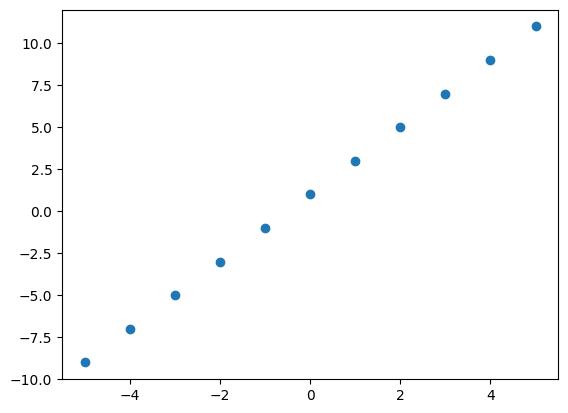

In [195]:
import matplotlib.pyplot as plt

plt.scatter(x, y) # 散布図グラフを描画
plt.show()

WSLを利用している場合など，Graphical User Interface (GUI) でない環境においては，`plt.show` 関数によりグラフを画面に表示することができません．
その場合には，`plt.savefig` 関数を利用してグラフを画像ファイルとして保存することができます．
散布図を `scatter.png` という名前のPNGファイルとして保存するには，以下のコードを実行します．
ただし，ファイルは作業ディレクトリに保存されます．別のディレクトリにファイルを作成したい場合には，そのファイルパスを `plt.savefig` 関数の引数として渡すこともできます．

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y) # 散布図グラフを描画
plt.savefig("scatter.png")

散布図ではなく、折れ線グラフとして描画することもできます。
折れ線グラフを描画するには、`plt.scatter` のかわりに `plt.plot` を用います。

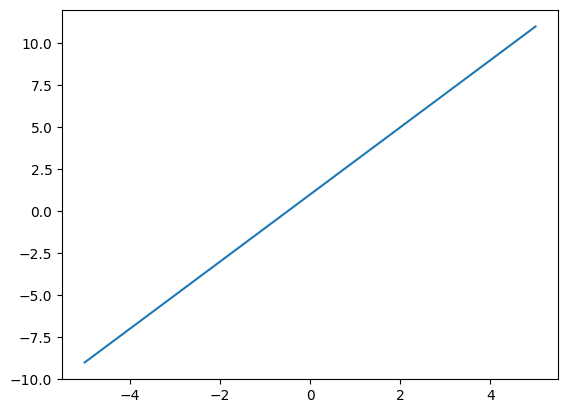

In [196]:
plt.plot(x, y)
plt.show()

## 2次関数のグラフの平行移動

上の例では直線のグラフを描画しましたが、$y$ を計算する式を変更すれば他にも様々な関数のグラフを描くことができます。
2次関数 $y = ax^2 + bx + c$ のグラフを描いてみましょう。

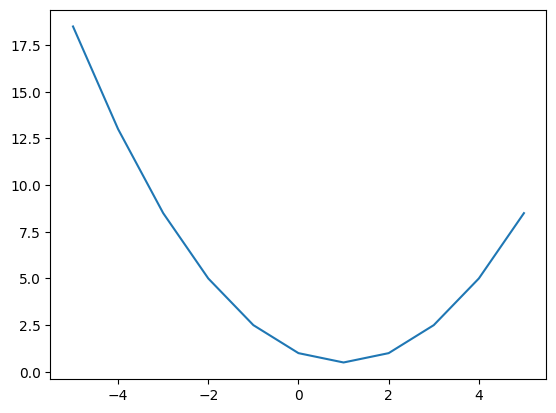

In [197]:
a = 1/2
b = -1
c = 1

x = np.arange(-5, 6)
y = a * x**2 + b * x + c

plt.plot(x, y)
plt.show()

2次関数は曲線であるため、折れ線グラフとして描いたときに少しかくかくしてしまっています。
これは、$x$ を変化させる幅をより細かくすることによって改善することができます。
`np.arange` と似た `np.linspace` 関数を使うと、$-5$ から $5$ までの範囲を $100$ 等分した配列を作ることができます。
これを $x$ として、再度同じ関数をプロットしてみましょう。

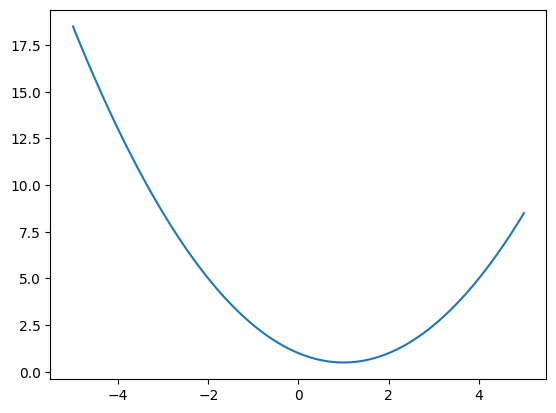

In [198]:
x = np.linspace(-5, 5, 100) # -5 から 5 までの範囲を 100 等分した1次元配列
y = a * x**2 + b * x + c

plt.plot(x, y)
plt.show()

曲線がなめらかになりました。

関数 $y = ax^2 + b^2 + c$ の $x$ を $x - \alpha$ に置き換えると、グラフを右に $\alpha$ だけ平行移動させることができます
（$\alpha < 0$ の場合は左に平行移動します）。

`plt.plot` を連続で実行することで、平行移動前後の2つのグラフを1つの図にまとめて描画してみましょう。

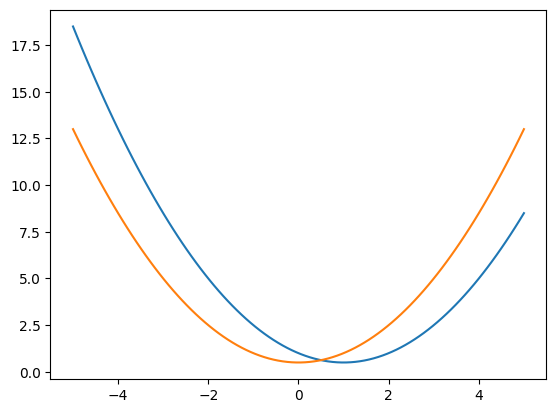

In [199]:
alpha = -1

x = np.linspace(-5, 5, 100)
y1 = a * x**2 + b * x + c
y2 = a * (x - alpha) **2 + b * (x - alpha) + c

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

関数の $x$ を $x - \alpha$ に置き換えるとグラフを右に平行移動させることができましたが、
次式のように $y$ を $x - \beta$ に置き換えるとグラフを上に $\beta$ だけ平行移動させることができます
（$\beta<0$ の場合は下に平行移動）。

$$
y - \beta = ax^2 + bx + c
$$

プログラミングのために $\beta$ を右辺に移項して
$$
y = ax^2 + bx + (c + \beta)
$$
として、実際にプロットしてみましょう。

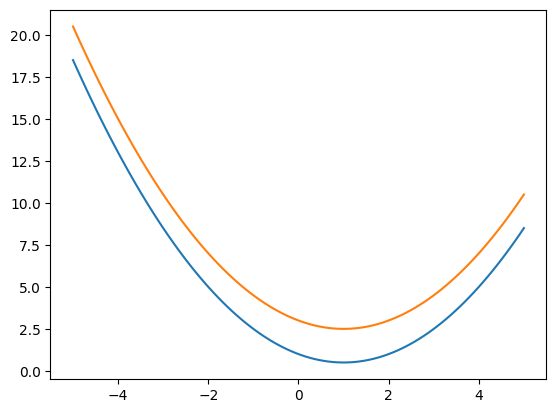

In [200]:
beta = 2

x = np.linspace(-5, 5, 100)
y1 = a * x**2 + b * x + c
y2 = a * x**2 + b * x + (c + beta)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

今回は2次関数を例にグラフを縦横に平行移動させましたが、同様に $x$ や $y$ を置き換えることで、他の関数も平行移動させることができます。

## 三角関数

$xy$ 平面上の単位円周上で、点 $(1, 0)$ から反時計回りに角度 $\theta$ だけ回転した点を $P (x, y)$ とします。
このとき、三角関数 $\sin{\theta}, \cos{\theta}$, および $\tan{\theta}$ は、点 $P$ の座標を用いて以下のように定義されます。

$$
\begin{aligned}
    \sin{\theta} &= y \\
    \cos{\theta} &= x \\
    \tan{\theta} &= \frac{y}{x} = \frac{\sin{\theta}}{\cos{\theta}} \\
\end{aligned}
$$

このことを図に表すと以下のとおりです．

![三角関数の定義](images/03/03_trigonometry.drawio.png)

三角関数を使うと，角度から三角形の辺の長さを計算できるようになり，大変便利です．

日常生活において角度を表す際は、1周を $360 \degree$ とする度数法を用います。
しかし、数学の分野では、1周を $2\pi [\mathrm{rad}]$ （単位はラジアンと読みます）とする弧度法を用いることが一般的です。
度数法で表された角度 $\phi$ から弧度法で表された角度 $\theta$ への変換は次式で行なえます。
$$
    \theta [\mathrm{rad}] = \frac{2\pi}{360} \phi [\degree]
$$

いくつかの角度に対する度数法と弧度法の対応を次の表に示します。
| 度数法 $[\degree]$ | $0$ | $30$ | $45$ | $60$ | $90$ | $180$ | $360$ |
| :---- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 弧度法 $[\mathrm{rad}]$ | $0$ | $\frac{\pi}{6}$ | $\frac{\pi}{4}$ | $\frac{\pi}{3}$ | $\frac{\pi}{2}$ | $\pi$ | $2\pi$|

NumPy にも三角関数の値を計算する関数が用意されていますが、引数には弧度法で表された角度を渡す必要があります。
`np.sin` は引数として配列が渡されると、各要素ごとに $\sin$ の値を計算します。
$0 \le \theta < 4\pi$の範囲で，$\sin \theta$と$\cos \theta$をプロットするプログラムは，以下のように書けます．

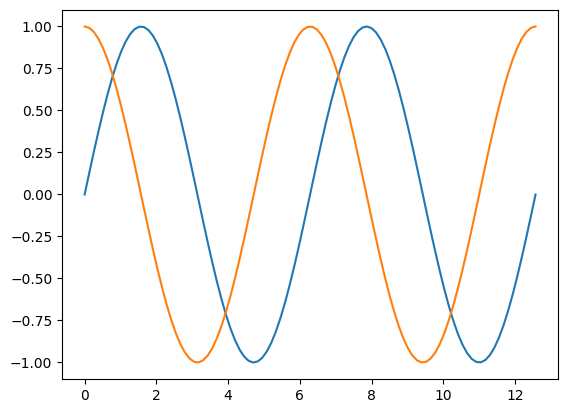

In [201]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4 * np.pi, 100) # 0 から 2π までの範囲を 100 等分した1次元配列
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

$\sin \theta$および$\cos \theta$は，$2\pi$の周期で同じ値が現れる波状の関数です（このような関数を周期関数といいます）．
このため，これらの関数は，波を数式で表現したいときによく用いられます．
また，$\sin \theta$と$\cos \theta$は，互いに$\theta$軸に沿った平行移動の関係にあります．
すなわち，
$$ \sin \theta = \cos \left(\theta - \frac{\pi}{2} \right) $$
が成り立ちます．

$0 \le \theta < 4\pi$の範囲で$\tan \theta$のグラフをプロットするプログラムは以下のとおりです．
$\tan \theta$は$\theta = (2n+1)\pi$ （$n$は整数）のとき，$\cos \theta=0$となってしまうため値を定義できません．

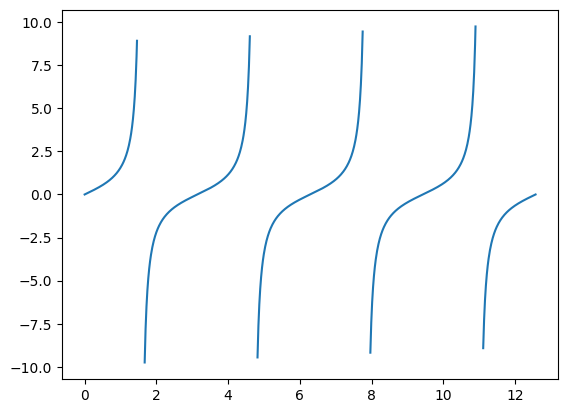

In [202]:
x = np.linspace(0, 4 * np.pi, 1000) # 0 から 4π までの範囲を 1000 等分した1次元配列
y = np.tan(x)
threshold = 10
y[y > threshold] = np.inf
y[y < -threshold] = -np.inf

plt.plot(x, y)
plt.show()

## 指数関数
$a$を$x$回掛け合わせるべき乗（累乗）$a^x$は，以下の指数法則を満たします．
$$
\begin{align}
    a^m a^n &= a^{m+n},\\
    (a^m)^n &= a^{mn}, \\
    (ab)^n &= a^n b^n
\end{align}
$$
ここで，$a^x$における$a$を底と呼ばれ，$x$を指数と呼ばれます．
$a$を$x$回掛け合わせるという考え方では，指数として自然数の場合しか考えることができません．
そこで，この考え方を脱却し，べき乗とは上の指数法則を満たす計算というように考え直すと，
指数を実数まで拡張することができます．
こうして拡張した指数を使って定義される関数を指数関数といい，次式で表します．
$$
    y = a^x (a > 0, a \neq 1)
$$

指数関数$y = 2^x$のグラフを$-5 \le x < 5$の範囲でプロットするプログラムを以下に示します．

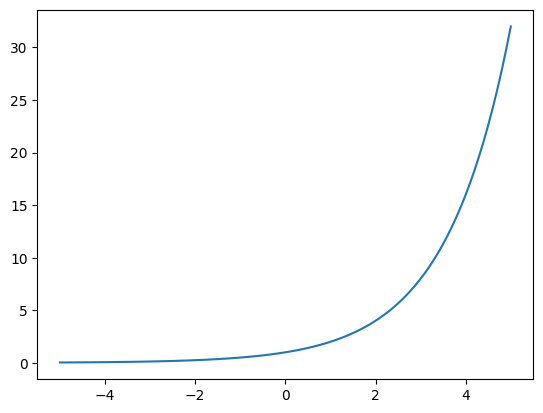

In [203]:
x = np.linspace(-5, 5, 100) # -5 から 5 までの範囲を 100 等分した1次元配列
a = 2
y = a**x

plt.plot(x, y)
plt.show()

グラフを見ると，指数関数は$x$の値が少し増加すると$y$の値が急激に増加することがわかります．

$$
    y = e^x = \exp(x)
$$

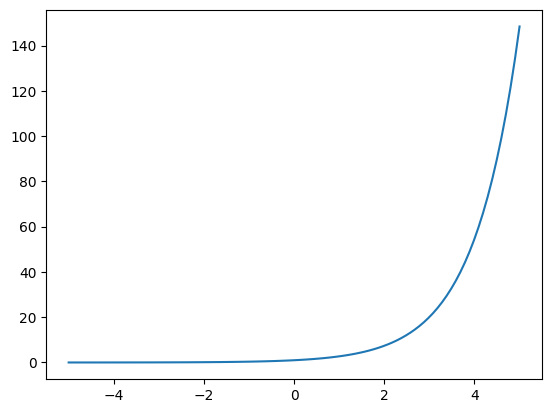

In [204]:
x = np.linspace(-5, 5, 100) # -5 から 5 までの範囲を 100 等分した1次元配列
y = np.exp(x)

plt.plot(x, y)
plt.show()

## 対数関数
対数関数は，指数関数$y = a^x$の逆関数です．
つまり，$a$と$y$がわかっているときに，$y = a^x$を満たすような$x$を計算する関数が対数関数で
$$
    x = \log_a y \; (a > 0, a \neq 1, y > 0)
$$
と書きます．
指数関数はどんな$x$についても$y$が正の値となるため，
対数関数に与える$y$も正である必要があります．

これまでの関数と同じように左辺の変数を$y$で書くと，
$$
    y = \log_a x \; (a > 0, a \neq 1, x > 0)
$$
となります．
具体的な例を挙げましょう．
$$
    y = \log_2 8
$$
という式は，$8$は$2$を何乗したものでしょう？という質問を考えていることになります．
$2^3 = 8$ですから，$8$は$2$を$3$乗したものです．
すなわち，$y=3$ということになります．

対数関数は指数関数と深く関連するため，指数法則に対応する法則の対数関数バージョンを考えることができます．
この法則は対数法則と呼ばれ，具体的には以下の式で表されます．
$$
\begin{align}
    \log_a MN &= \log_a M + \log_a N \\
    \log_a \frac{M}{N} &= \log_a M - \log_a N\\
    \log_a M^p &= p \log_a M
\end{align}
$$
この対数法則は，対数を使うと$MN$のような掛け算や$\frac{M}{N}$のような割り算を
それぞれ足し算や引き算にできるということを意味しています．
これがとても便利で，コンピュータのない時代には，
大きい数同士の掛け算を対数法則で足し算に変換してから計算するなど，とても重宝されました．
現在でも，コンピュータでたくさんの掛け算を計算させたいときに，
対数法則を使って足し算として計算することがよくあります．

NumPyには，底が2の対数を計算する関数 `np.log2`，底が10の対数（常用対数と呼ばれます）を計算する関数 `np.log10`，および底がネイピア数$e$の対数（自然対数と呼ばれます．詳しくは4章で説明します）を計算する関数 `np.log`が用意されています．
2を底とする対数関数$y = \log_2 x$のグラフを$0 \le x < 5$の範囲でプロットするプログラムを以下に示します．

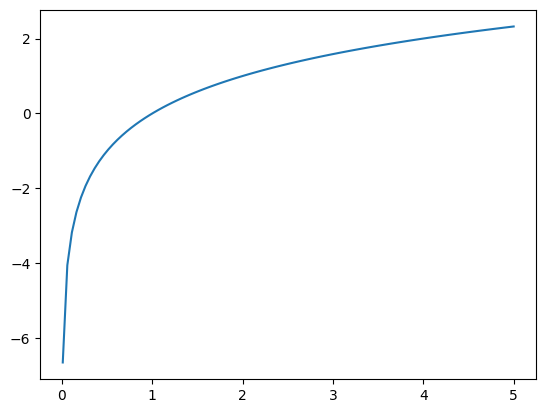

In [205]:
x = np.linspace(0.01, 5, 100) # -5 から 5 までの範囲を 100 等分した1次元配列
y = np.log2(x)

plt.plot(x, y)
plt.show()

そのほかの底を持つ対数を計算するための関数は，NumPyには用意されていません．
しかし，対数関数は，底を$a$から1でない任意の正数$b$に次式の通り変換することができます．
$$
    \log_a M = \frac{\log_b M}{\log_b a}
$$
この公式を使うと，任意の底を持つ対数を，NumPyに用意されている関数のみで計算することができます．

## ブロードキャスト

行列同士の要素ごとの四則演算は、通常は行列の形が同じでなければ定義できません。
しかし、前節の最後では $3 \times 3$ 行列に 3 次元ベクトルを足す計算が実行できました。

これが要素ごとの計算と同じように実行できる理由は、NumPy が自動的に 3 次元ベクトル `b` を 3 つ並べてできる $3 \times 3$ 行列を想定し、`a` と同じ形に揃える操作を暗黙に行っているからです。
この操作を、**ブロードキャスト**と呼びます。

算術演算を異なる形の配列同士で行う場合、NumPy は自動的に小さい方の配列を**ブロードキャスト**し、大きい方の配列と形を合わせます。
ただし、この自動的に行われるブロードキャストでは、行いたい算術演算が、大きい方の配列の一部に対して**繰り返し行われる**ことで実現されるため、実際に小さい方の配列のデータをコピーして大きい配列をメモリ上に作成することは可能な限り避けられます。
また、この繰り返しの計算は NumPy の内部の C 言語によって実装されたループで行われるため、高速です。

よりシンプルな例で考えてみましょう。
以下のような配列 `a` があり、この全ての要素を 2 倍にしたいとします。

In [ ]:
a = np.array([1, 2, 3])

a

array([1, 2, 3])

このとき、一つの方法は以下のように同じ形で要素が全て 2 である別の配列を定義し、これと要素ごとの積を計算するやり方です。

In [ ]:
b = np.array([2, 2, 2])

c = a * b

c

array([2, 4, 6])

しかし、スカラの 2 をただ `a` に掛けるだけでも同じ結果が得られます。

In [ ]:
c = a * 2

c

array([2, 4, 6])

`* 2` という計算が、`c` の 3 つの要素の**どの要素に対する計算なのか**が明示されていないため、NumPy はこれを**全ての要素に対して行うという意味**だと解釈して、スカラの 2 を `a` の要素数 3 だけ引き伸ばしてから掛けてくれます。

**形の異なる配列同士の計算がブロードキャストによって可能になるためにはルールがあります。**

それは、**「2 つの配列の各次元が同じ大きさになっているか、どちらかが 1 であること」**です。
このルールを満たさない場合、NumPy は "ValueError: operands could not be broadcast together with shapes (1 つ目の配列の形) (2 つ目の配列の形)" というエラーを出します。

ブロードキャストされた配列の各次元のサイズ（[注釈4](#note4)）は、入力された配列のその次元のサイズの中で最大の値と同じになっています。
入力された配列は、各次元のサイズが入力のうち大きい方のサイズと同じになるようブロードキャストされ、その拡張されたサイズで計算されます。

もう少し具体例を見てみましょう。
以下のような 2 つの配列 `a` と `b` を定義し、足します。

In [ ]:
# 0 ~ 9 の範囲の値をランダムに用いて埋められた (2, 1, 3) と (3, 1) という大きさの配列を作る
a = np.random.randint(0, 10, (2, 1, 3))
b = np.random.randint(0, 10, (3, 1))

print('a:\n', a)
print('\na.shape:', a.shape)
print('\nb:\n', b)
print('\nb.shape:', b.shape)

# 加算
c = a + b

print('\na + b:\n', c)
print('\n(a + b).shape:', c.shape)

a:
 [[[9 5 1]]

 [[6 3 2]]]

a.shape: (2, 1, 3)

b:
 [[6]
 [5]
 [4]]

b.shape: (3, 1)

a + b:
 [[[15 11  7]
  [14 10  6]
  [13  9  5]]

 [[12  9  8]
  [11  8  7]
  [10  7  6]]]

(a + b).shape: (2, 3, 3)


`a` の形は `(2, 1, 3)` で、`b` の形は `(3, 1)` でした。
この 2 つの配列の**末尾次元 (trailing dimension)**（[注釈5](#note5)） はそれぞれ 3 と 1 なので、ルールにあった「次元が同じサイズであるか、どちらかが 1 であること」を満たしています。

次に、各配列の第 2 次元に注目してみましょう。
それぞれ 1 と 3 です。
これもルールを満たしています。

ここで、`a` は 3 次元配列ですが、`b` は 2 次元配列です。
つまり、次元数が異なっています。
このような場合は、`b` は**一番上の次元にサイズが 1 の次元が追加された形** `(1, 3, 1)` として扱われます。
そして 2 つの配列の各次元ごとのサイズの最大値をとった形 `(2, 3, 3)` にブロードキャストされ、足し算が行われます。

このように、もし 2 つの配列のランクが異なる場合は、次元数が小さい方の配列が大きい方と同じ次元数になるまでその形の先頭に新たな次元が追加されます。
サイズが 1 の次元がいくつ追加されても、要素の数は変わらないことに注意してください。
要素数（`size` 属性で取得できる値）は、各次元のサイズの掛け算になるので、1 を何度かけても値は変わらないことから、これが成り立つことが分かります。

NumPy がブロードキャストのために自動的に行う新しい次元の挿入は、`[]` を使った以下の表な表記を用いることで**手動で行うこともできます。**

In [ ]:
print('Original shape:', b.shape)

b_expanded = b[np.newaxis, :, :]

print('Added new axis to the top:', b_expanded.shape)

b_expanded2 = b[:, np.newaxis, :]

print('Added new axis to the middle:', b_expanded2.shape)

Original shape: (3, 1)
Added new axis to the top: (1, 3, 1)
Added new axis to the middle: (3, 1, 1)


`np.newaxis` が指定された位置に、新しい次元が挿入されます。
配列が持つ数値の数は変わっていません。
そのため、挿入された次元のサイズは必ず 1 になります。

In [ ]:
b

array([[6],
       [5],
       [4]])

In [ ]:
b_expanded

array([[[6],
        [5],
        [4]]])

In [ ]:
b_expanded2

array([[[6]],

       [[5]],

       [[4]]])

NumPy のブロードキャストは慣れるまで直感に反するように感じる場合があるかもしれません。
しかし、使いこなすと同じ計算が Python のループを使って行うよりも高速に行えるため、ブロードキャストを理解することは非常に重要です。
一つ具体例を見てみます。

$5 \times 5$ 行列 `a` に、3 次元ベクトル `b` を足します。
まず、`a`、`b` および結果を格納する配列 `c` を定義します。

In [ ]:
a = np.array([
    [0, 1, 2, 1, 0],
    [3, 4, 5, 4, 3],
    [6, 7, 8, 7, 6],
    [3, 4, 5, 4, 4],
    [0, 1, 2, 1, 0]
])

b = np.array([1, 2, 3, 4, 5])

# 結果を格納する配列を先に作る
c = np.empty((5, 5))

`%%timeit` という Jupyter Notebook で使用できるそのセルの実行時間を計測するためのマジックを使って、`a` の各行（1 次元目）に `b` の値を足していく計算を Python のループを使って 1 行ずつ処理していくコードの実行時間を測ってみます。

In [ ]:
%%timeit
for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b

8.82 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
c

array([[ 1.,  3.,  5.,  5.,  5.],
       [ 4.,  6.,  8.,  8.,  8.],
       [ 7.,  9., 11., 11., 11.],
       [ 4.,  6.,  8.,  8.,  9.],
       [ 1.,  3.,  5.,  5.,  5.]])

次に、NumPy のブロードキャストを活用した方法で同じ計算を行ってみます。

In [ ]:
%%timeit
c = a + b

1.16 µs ± 35.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
c

array([[ 1.,  3.,  5.,  5.,  5.],
       [ 4.,  6.,  8.,  8.,  8.],
       [ 7.,  9., 11., 11., 11.],
       [ 4.,  6.,  8.,  8.,  9.],
       [ 1.,  3.,  5.,  5.,  5.]])

計算結果は当然同じになります。
しかし、実行時間が数倍短くなっています。

このように、ブロードキャストを理解して活用することで、記述が簡単になるだけでなく、実行速度という点においても有利になります。

## 基本的な統計量の求め方

本節では、多次元配列に含まれる値の平均・分散・標準偏差・最大値・最小値といった統計値を計算する方法を紹介します。
$8 \times 10$ の行列を作成し、この中に含まれる値全体に渡るこれらの統計値を計算してみましょう。

In [ ]:
x = np.random.randint(0, 10, (8, 10))

x

array([[2, 3, 9, 3, 2, 6, 1, 6, 4, 7],
       [4, 9, 7, 6, 8, 5, 3, 6, 1, 6],
       [3, 4, 4, 8, 9, 0, 9, 3, 7, 1],
       [8, 5, 3, 1, 9, 6, 5, 9, 3, 8],
       [6, 7, 9, 4, 5, 6, 9, 7, 2, 7],
       [3, 6, 4, 8, 8, 1, 7, 9, 3, 5],
       [6, 2, 8, 6, 1, 9, 3, 7, 4, 8],
       [6, 2, 5, 8, 8, 2, 9, 4, 0, 4]])

In [ ]:
# 平均値
x.mean()

5.2625

In [127]:
# 分散
x.var()

6.918593749999999

In [128]:
# 標準偏差
x.std()

2.6303219859933495

In [158]:
# 最大値
x.max()

3.0

In [159]:
# 最小値
x.min()

1.0

ここで、`x` は 2 次元配列なので、各次元に沿ったこれらの統計値の計算も行えます。
例えば、最後の次元内だけで平均をとると、8 個の平均値が得られるはずです。
平均を計算したい軸（何次元目に沿って計算するか）を `axis` という引数に指定します。

In [160]:
x.mean(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

これは、以下のように 1 次元目の値の平均を計算していったものを並べているのと同じことです。
（ゼロベースインデックスで考えています。`x` の形は `(8, 10)` なので、0 次元目のサイズが 8、1 次元目のサイズが 10 です。）

In [ ]:
np.array([
    x[0, :].mean(),
    x[1, :].mean(),
    x[2, :].mean(),
    x[3, :].mean(),
    x[4, :].mean(),
    x[5, :].mean(),
    x[6, :].mean(),
    x[7, :].mean(),
])

array([5. , 4.3, 6.2, 5.2, 6.2, 4.2, 5.3, 3.5])

数式を NumPy による配列の計算に落とし込むことに慣れていくには少し時間がかかりますが、慣れると少ない量のコードで記述できるだけでなく、高速に計算が行なえるため、大きな恩恵があります。

<hr />

<div class="alert alert-info">
**注釈 1**

ライブラリとは、汎用性の高い複数の関数やクラスなどを再利用可能な形でひとまとまりにしたもので、Python の世界では**パッケージ**とも呼ばれます。また、Python で関数やクラスの定義、文などが書かれたファイルのことを**モジュール**と呼び、パッケージはモジュールが集まったものです。

[▲上へ戻る](#ref_note1)
</div>

<div class="alert alert-info">
**注釈 2**

NumPy には matrix というクラスも存在しますが、本チュートリアルでは基本的に多次元配列を表す ndarray をベクトルや行列を表すために用います。

[▲上へ戻る](#ref_note2)
</div>

<div class="alert alert-info">
**注釈 3**

これは、その多次元配列が表すテンソルの**階数（rank、以下ランク）**と対応します。

[▲上へ戻る](#ref_note3)
</div>

<div class="alert alert-info">
**注釈 4**
    
「次元のサイズ」と言った場合はその次元の大きさを意味し、配列の `size` 属性とは異なるものを指しています。

[▲上へ戻る](#ref_note4)
</div>

<div class="alert alert-info">
**注釈 5**
    
末尾次元（trailing dimension）とは、その配列の形を表すタプルの一番最後の値のことを指します。

[▲上へ戻る](#ref_note5)
</div>